# Deep Learning Project 
## LE Thi Hoa - p2310380

## Part 1 : Perceptron Indicate the size of each tensor of the provided file perceptron_pytorch.py. Explain. 
In file perceptron_pytorch.py, we have the tensors: 
- “data_train” is the training data, which is a tensor containing training samples from the MNIST dataset. The size of “data_train” is (number of training samples, number of features).
- The size of tensor data_train = torch.Size([63000, 784])
- “label_train” is the corresponding label for the training data. The size of “label_train” is (number of training samples, number of classes). 
- The size of tensor label_train = torch.Size([63000, 10])
- “data_test” is the testing data, containing test samples from the MNIST dataset. The size of “data_test” is (number of testing samples, number of features).
- The size of tensor data_test = torch.Size([7000, 784])
- “Label_test” is the corresponding label for the testing data. The size of “label_test” is (number of testing samples, number of classes).
- The size of tensor label_test = torch.Size([7000, 10])
- “w” is a tensor that contains the model's weights. The size of “w” is (the number of features, the number of classes). It is initialized with random values in the range from -0.001 to 0.001.
- The size of tensor w = torch.Size([784, 10])
- “b” is a tensor that contains bias values of the model. The size of  “b” is (1, number of classes), and it is also initialized with random values in the range from -0.001 to 0.001.
- The size of tensor b = torch.Size([1, 10])


In [91]:
# import required libraries
import torch, gzip
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import torch.nn as nn
import torch.optim as optim

In [153]:
# read data and check size 

((data_train, label_train), (data_test, label_test)) = torch.load(gzip.open("mnist.pkl.gz"))

print("Size of data_train", data_train.shape)
print("Size of lable_train", label_train.shape)
print("Size of data_test", data_test.shape)
print("Size of label_test", label_test.shape)

Size of data_train torch.Size([63000, 784])
Size of lable_train torch.Size([63000, 10])
Size of data_test torch.Size([7000, 784])
Size of label_test torch.Size([7000, 10])


### Visualization images 


In [136]:
def imshow(img, figsize=(2, 2)):
    fig, ax = plt.subplots(1, 1, figsize=(figsize))
    ax.axis('off')
    ax.imshow(img)

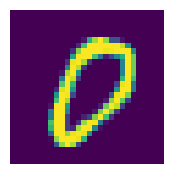

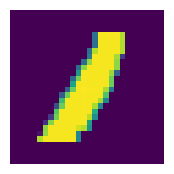

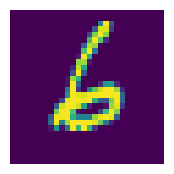

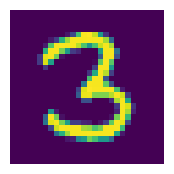

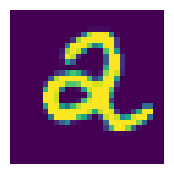

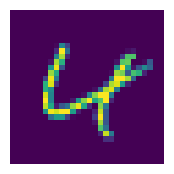

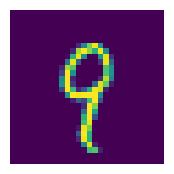

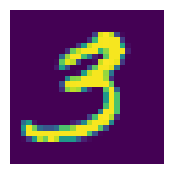

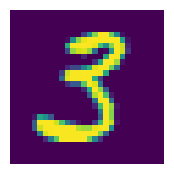

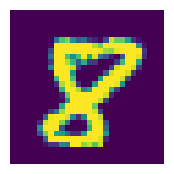

In [137]:
for i in range(10): 
    imshow(np.array(data_train[i], dtype='float').reshape(28, 28))

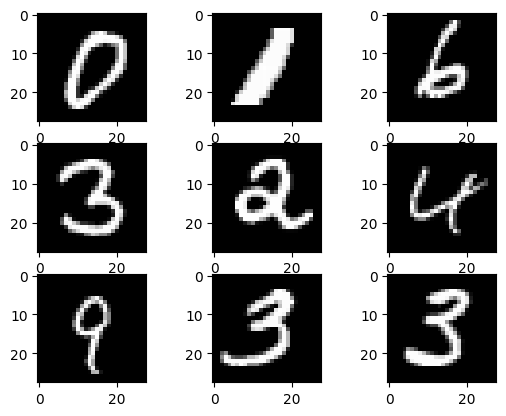

In [138]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(np.array(data_train[i], dtype='float').reshape(28, 28), cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

## Prepare data

In [154]:
batch_size = 5  # number of data read each time

In [155]:
# initialising the data loaders
train_dataset = torch.utils.data.TensorDataset(data_train, label_train)
test_dataset = torch.utils.data.TensorDataset(data_test, label_test)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

# Part 2: Shallow network
- In this part, you will implement a MLP with only one hidden layer and a linear output layer.
- By taking inspiration from perceptron_pytorch_data_auto_layer_optim.py, implement a shallow network using the tools provided by PyTorch.
- Find some hyperparameters (η and the number of neurons in the hidden layer) that provide a good performance. Explain precisely your methodology and the influence of each hyperparameter on the performance.

In [141]:
# Define simple MLP model
class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(self.relu(x))
        x = self.fc2(x)
        return x

#### Create a function to train model simpleMLP

In [142]:
def train_model_SimpleMLP(learning_rate, hidden_size):
    
    # Define
    input_size = data_train.shape[1]  # Number of input features (corresponding to MNIST image size)
    output_size = label_train.shape[1]  # Size of output (corresponding to digits 0 to 9)

    # Define model simpleMLP
    model = SimpleMLP(input_size, hidden_size, output_size)
    
    # Define loss function and optimizer
    criterion = nn.MSELoss(reduction='sum')
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    for epoch in range(5):  # number of iteration (epoch)
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

        # Evaluate the model on the test set
        correct = 0
        total = 0
        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                _, predicted = torch.max(output, 1)
                _, labels = torch.max(target, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
    
        accuracy = 100 * correct / total
        print(f"Epoch: {epoch} - Accurary: {accuracy}")
            
    return accuracy
    

#### Try different values to find best learning_rate and best hidden_size

In [143]:
# A few values of learning_rate and hidden_size
learning_rates = [0.001, 0.01, 0.1]
hidden_sizes = [64, 128, 256]

best_accuracy = 0.0
best_hidden_size = 0
best_learning_rate = 0.0

# train model to find best hyperparameters
for lr in learning_rates:
    for hs in hidden_sizes:
        print(f"Training with learning rate {lr} and hidden size {hs}")
        acc = train_model_SimpleMLP(lr, hs)
        
        # Check if this combination is the best so far
        if acc > best_accuracy:
            best_accuracy = acc
            best_hidden_size = hs
            best_learning_rate = lr
    
print(f"Best Hidden Size: {best_hidden_size}, Best Learning Rate: {best_learning_rate}, Best Accuracy: {best_accuracy:.2f}%")

Training with learning rate 0.001 and hidden size 64
Epoch: 0 - Accurary: 85.92857142857143
Epoch: 1 - Accurary: 85.87142857142857
Epoch: 2 - Accurary: 85.52857142857142
Epoch: 3 - Accurary: 85.47142857142858
Epoch: 4 - Accurary: 85.95714285714286
Training with learning rate 0.001 and hidden size 128
Epoch: 0 - Accurary: 86.44285714285714
Epoch: 1 - Accurary: 85.02857142857142
Epoch: 2 - Accurary: 85.67142857142858
Epoch: 3 - Accurary: 85.2
Epoch: 4 - Accurary: 86.35714285714286
Training with learning rate 0.001 and hidden size 256
Epoch: 0 - Accurary: 85.47142857142858
Epoch: 1 - Accurary: 84.7
Epoch: 2 - Accurary: 84.91428571428571
Epoch: 3 - Accurary: 86.14285714285714
Epoch: 4 - Accurary: 85.9
Training with learning rate 0.01 and hidden size 64
Epoch: 0 - Accurary: 82.34285714285714
Epoch: 1 - Accurary: 79.38571428571429
Epoch: 2 - Accurary: 80.37142857142857
Epoch: 3 - Accurary: 82.22857142857143
Epoch: 4 - Accurary: 81.78571428571429
Training with learning rate 0.01 and hidden si

### Train model with hidden size = 128, Learning rate = 0.001 

In [144]:
# Define model simpleMLP
model_simpleMlP = SimpleMLP(data_train.shape[1], 128, label_train.shape[1])
    
# Define loss function and optimizer
criterion = nn.MSELoss(reduction='sum')
optimizer = optim.SGD(model_simpleMlP.parameters(), lr=0.001)

for epoch in range(5):  # number of iteration (epoch)
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model_simpleMlP(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
    # Evaluate the model on the test set
    # testing the model (test accuracy is computed during training for monitoring)
    acc = 0.0
    # reading all the testing data
    for x, t in test_loader:	
        # computing the output of the model
        y = model_simpleMlP(x)
        # checking if the output is correct
        acc += torch.argmax(y,1) == torch.argmax(t,1)
        
    # printing the accuracy
    print(f"Epoch: {epoch} - Accurary: {(acc/data_test.shape[0])*100}")

Epoch: 0 - Accurary: tensor([85.9571])
Epoch: 1 - Accurary: tensor([85.2143])
Epoch: 2 - Accurary: tensor([86.8000])
Epoch: 3 - Accurary: tensor([85.1857])
Epoch: 4 - Accurary: tensor([85.2857])


### Report: 
- The model is built as a simple feedforward neural network with: an input layer, a hidden layer, and an output layer.
- Below are the details of how the model is constructed.
- I use the ReLU activation function.
- Hidden_size: Controls the model's capacity to capture complex patterns. A larger hidden_size can lead to better performance but may result in overfitting if not tuned properly.
- Learning_rate: Determines the training speed and stability. The choice of learning rate affects the convergence and optimization process. Selecting an appropriate learning rate is necessary for successful training.
- So,  I try different values of learning_rate and hidden_size to find the best hidden_size and learning_rate.
- The code for the results: Best Hidden Size: **256**, Best Learning Rate: **0.001**, Best Accuracy: **86.35%%**


# Part 3 : Deep network
- As you are now more familar with PyTorch, you can use it to test deeper models.
- Implement a deep network (i.e. with at least two hidden layers) using the tools
provided by PyTorch.
- Find some hyperparameters (η, number of hidden layers and the number of
neurons in the hidden layers) that provide a good performance. 
- Explain precisely your methodology and the influence of each hyperparameter on the per- formance.

#### Define a deeper model MLP


In [156]:
# Define deeper model MLP
class Deeper_MLP(nn.Module):
    def __init__(self):
        super(Deeper_MLP, self).__init__()
        self.fc1 = nn.Linear(data_train.shape[1], 512)  
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, label_train.shape[1])

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

#### Creater a function to train model 

In [161]:
# Training deeper model MLP
def train_deeper_mlp(learning_rate):
    model_deeper = Deeper_MLP()
    criterion = nn.MSELoss(reduction='sum')
    optimizer = optim.SGD(model_deeper.parameters(), lr=learning_rate)

    # iteration (epoch)
    for epoch in range(5):  
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model_deeper(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

        # Evaluate the model on the test set
        correct = 0
        total = 0
        with torch.no_grad():
            for data, target in test_loader:
                output = model_deeper(data)
                _, predicted = torch.max(output, 1)
                _, labels = torch.max(target, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
    
        accuracy = 100 * correct / total
        print(f"Epoch: {epoch} - Accurary: {accuracy}")
            
    return accuracy

#### Try difference values of learning_rates and hidden_size to find best values 

In [162]:
# The values of learning_rate and hidden_size
learning_rates_deeper = [0.001, 0.01, 0.1]

best_accuracy_deeper = 0.0
best_learning_rate_deeper= 0.0


# find best values
for lr in learning_rates:
    print(f"Training with learning rate {lr}")
    acc = train_deeper_mlp(lr)
        
    # Check if this combination is the best so far
    if acc > best_accuracy_deeper:
        best_accuracy_deeper = acc
        best_learning_rate_deeper = lr
    
print(f"Best Learning Rate: {best_learning_rate_deeper}, Best Accuracy: {best_accuracy_deeper:.2f}%")

Training with learning rate 0.001
Epoch: 0 - Accurary: 94.84285714285714
Epoch: 1 - Accurary: 96.54285714285714
Epoch: 2 - Accurary: 97.27142857142857
Epoch: 3 - Accurary: 97.64285714285714
Epoch: 4 - Accurary: 98.05714285714286
Training with learning rate 0.01
Epoch: 0 - Accurary: 97.55714285714286
Epoch: 1 - Accurary: 98.08571428571429
Epoch: 2 - Accurary: 98.42857142857143
Epoch: 3 - Accurary: 98.41428571428571
Epoch: 4 - Accurary: 98.64285714285714
Training with learning rate 0.1
Epoch: 0 - Accurary: 10.085714285714285
Epoch: 1 - Accurary: 10.842857142857143
Epoch: 2 - Accurary: 10.085714285714285
Epoch: 3 - Accurary: 10.042857142857143
Epoch: 4 - Accurary: 10.942857142857143
Best Learning Rate: 0.01, Best Accuracy: 98.64%


### Explanations
- Model Deeper_MLP - It is a multi-layer perceptron (MLP) model with three fully connected layers.
- The layers in the model are defined as follows:

- fc1: Input layer with data_train.shape[1] input features and 512 output features.
- relu: ReLU activation function.
- fc2: Hidden layer with 512 input features and 256 output features.
- fc3: Output layer with 256 input features and label_train.shape[1] output features.
- The forward method is responsible for the forward pass of the model. It takes an input x, reshapes it to a 2D tensor, and passes it through the layers in the defined sequence, applying ReLU activation after each fully connected layer. The final output of the model is returned.
- I use ReLU activation function
- Similar to part 2, I try several learning_rate values to find the best value.
- Best Learning Rate: **0.01**, Best Accuracy: **98.64%**
- Improve the model by finding the best value of **number of hidden layers** and **the number of
neurons in the hidden layers**

## ------------------------------------------------------------------- 
### Find some hyperparameters (η, number of hidden layers and the number of neurons in the hidden layers) that provide a good performance. 
## ------------------------------------------------------------------- 

In [163]:
# Define a model with at least two hidden layers
class DeepNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(DeepNetwork, self).__init__()
        self.input_layer = nn.Linear(input_size, hidden_sizes[0])
        self.hidden_layers = nn.ModuleList([nn.Linear(hidden_sizes[i], hidden_sizes[i + 1]) for i in range(len(hidden_sizes) - 1)])
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = self.output_layer(x)
        return x



In [164]:
# Function to train and test a model with a specific set of parameters
def train_and_evaluate(learning_rate, hidden_sizes):
    # Model definition
    model_deeper = DeepNetwork(input_size, hidden_sizes, output_size)

    # Loss function definition and optimization
    criterion = nn.MSELoss(reduction='sum')
    optimizer = optim.SGD(model_deeper.parameters(), lr=learning_rate)

    # iteration (epoch)
    for epoch in range(5):  
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model_deeper(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

        # Evaluate the model on the test set
        correct = 0
        total = 0
        with torch.no_grad():
            for data, target in test_loader:
                output = model_deeper(data)
                _, predicted = torch.max(output, 1)
                _, labels = torch.max(target, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
    
        accuracy = 100 * correct / total
        print(f"Epoch: {epoch} - Accurary: {accuracy}")
            
    return accuracy



- Designing a function to train and evaluate a deep neural network model with a specific set of hyperparameters, including learning rate and hidden layer sizes.
- It performs training using the Adam optimizer and means squared error loss for a specified number of epochs. After each epoch, it evaluates the model on the test set and prints the accuracy.
- The purpose is to observe the model's performance under different hyperparameter configurations and assess how changes in learning rate and hidden layer sizes affect accuracy.


### Try with 2 layers

In [165]:
# The values to try 
learning_rates = [0.001, 0.01]
hidden_sizes_list = [[64, 32], [128, 64], [256, 128]]

# Generate all parameter combinations
parameter_combinations = [(lr, hs) for lr in learning_rates for hs in hidden_sizes_list]

# Set up hyperparameters
input_size = 784  
output_size = 10  
num_epochs = 5

# Start searching for hyperparameters
best_accuracy = 0
best_params = None

for lr, hs in parameter_combinations:
    accuracy = train_and_evaluate(lr, hs)
    print(f'Learning Rate: {lr}, Hidden Sizes: {hs}, Accuracy: {accuracy}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = (lr, hs)

print(f'Best Parameters: Learning Rate = {best_params[0]}, Hidden Sizes = {best_params[1]}, Best Accuracy = {best_accuracy}')

Epoch: 0 - Accurary: 93.45714285714286
Epoch: 1 - Accurary: 94.98571428571428
Epoch: 2 - Accurary: 95.87142857142857
Epoch: 3 - Accurary: 96.15714285714286
Epoch: 4 - Accurary: 96.38571428571429
Learning Rate: 0.001, Hidden Sizes: [64, 32], Accuracy: 96.38571428571429
Epoch: 0 - Accurary: 94.04285714285714
Epoch: 1 - Accurary: 95.91428571428571
Epoch: 2 - Accurary: 96.58571428571429
Epoch: 3 - Accurary: 96.95714285714286
Epoch: 4 - Accurary: 97.3
Learning Rate: 0.001, Hidden Sizes: [128, 64], Accuracy: 97.3
Epoch: 0 - Accurary: 94.47142857142858
Epoch: 1 - Accurary: 96.04285714285714
Epoch: 2 - Accurary: 96.8
Epoch: 3 - Accurary: 97.4
Epoch: 4 - Accurary: 97.58571428571429
Learning Rate: 0.001, Hidden Sizes: [256, 128], Accuracy: 97.58571428571429
Epoch: 0 - Accurary: 96.18571428571428
Epoch: 1 - Accurary: 96.91428571428571
Epoch: 2 - Accurary: 97.38571428571429
Epoch: 3 - Accurary: 97.31428571428572
Epoch: 4 - Accurary: 97.31428571428572
Learning Rate: 0.01, Hidden Sizes: [64, 32], Ac

#### Best Parameters: 
- Learning Rate = 0.01: The learning rate is a hyperparameter that determines the step size at each iteration while moving toward a minimum of the loss function. In this case, a learning rate of 0.001 was found to be the most effective during the model training process.
- Hidden Sizes = [256, 128]: The hidden sizes refer to the number of neurons in each hidden layer of the neural network. In this context, the model has two hidden layers with 256 neurons in the first hidden layer and 128 neurons in the second hidden layer. These values were identified as optimal for achieving the highest accuracy during training.
- Best Accuracy = 98.48571428571428%: This represents the highest accuracy achieved by the model on the test set. It indicates the percentage of correctly predicted instances out of the total instances in the test set. The mentioned accuracy of approximately 97.94% is considered the best accuracy attained by the model under the specified learning rate and hidden layer sizes.


### Try With 3 Layers

In [168]:
# The values to try 
learning_rates = [0.001, 0.01]
hidden_sizes_list_3_layer = [[64, 32, 16], [128, 64, 32], [256, 128, 64]]

# Generate all parameter combinations
parameter_combinations_3 = [(lr, hs) for lr in learning_rates for hs in hidden_sizes_list_3_layer]

# Start searching for hyperparameters
best_accuracy_3 = 0
best_params_3 = None

for lr, hs in parameter_combinations_3:
    accuracy = train_and_evaluate(lr, hs)
    print(f'Learning Rate: {lr}, Hidden Sizes: {hs}, Accuracy: {accuracy}')

    if accuracy > best_accuracy:
        best_accuracy_3 = accuracy
        best_params_3 = (lr, hs)


Epoch: 0 - Accurary: 92.11428571428571
Epoch: 1 - Accurary: 94.94285714285714
Epoch: 2 - Accurary: 96.15714285714286
Epoch: 3 - Accurary: 96.44285714285714
Epoch: 4 - Accurary: 96.81428571428572
Learning Rate: 0.001, Hidden Sizes: [64, 32, 16], Accuracy: 96.81428571428572
Epoch: 0 - Accurary: 93.42857142857143
Epoch: 1 - Accurary: 95.51428571428572
Epoch: 2 - Accurary: 96.37142857142857
Epoch: 3 - Accurary: 96.94285714285714
Epoch: 4 - Accurary: 97.32857142857142
Learning Rate: 0.001, Hidden Sizes: [128, 64, 32], Accuracy: 97.32857142857142
Epoch: 0 - Accurary: 94.34285714285714
Epoch: 1 - Accurary: 96.05714285714286
Epoch: 2 - Accurary: 96.88571428571429
Epoch: 3 - Accurary: 97.41428571428571
Epoch: 4 - Accurary: 97.8
Learning Rate: 0.001, Hidden Sizes: [256, 128, 64], Accuracy: 97.8
Epoch: 0 - Accurary: 94.44285714285714
Epoch: 1 - Accurary: 96.94285714285714
Epoch: 2 - Accurary: 96.7
Epoch: 3 - Accurary: 97.35714285714286
Epoch: 4 - Accurary: 97.07142857142857
Learning Rate: 0.01, H

#### Best Parameters:
- Learning Rate = 0.001: The learning rate is a hyperparameter that controls the step size during the optimization process. In this case, a learning rate of 0.001 was found to be the most effective for updating the model parameters while training.
- Hidden Sizes = [256, 128, 64]: The hidden sizes correspond to the number of neurons in each hidden layer of the neural network. The model in question has three hidden layers, with 256 neurons in the first layer, 128 neurons in the second layer, and 64 neurons in the third layer. These specific hidden layer sizes were determined as optimal for achieving high accuracy during training.
- Best Accuracy = 97.98571428571428%: This indicates the highest accuracy achieved by the model on the test set. The accuracy represents the percentage of correctly predicted instances out of the total instances in the test set. In this scenario, the model achieved an accuracy of approximately 97.99%, which is considered the best accuracy under the specified learning rate and hidden layer sizes.


### Let's discuss the hyperparameters and their influence:
- **Learning Rate (learning_rate)**: This parameter controls the step size during optimization. Too high a learning rate may cause the model to converge too quickly and potentially overshoot the minimum. Too low a learning rate may result in slow convergence or the model getting stuck in a local minimum. Common values to try are 0.1, 0.01, 0.001, etc.
- **Number of Hidden Layers (hidden_sizes)**: This parameter determines the depth of your network. Adding more layers allows the model to capture more complex relationships in the data but also increases the risk of overfitting. Start with a small number of hidden layers and gradually increase if needed.
- **Number of Neurons in Hidden Layers (hidden_sizes)**: The number of neurons in each hidden layer influences the capacity of the model to learn complex patterns. More neurons provide the model with more capacity but also increase the risk of overfitting. You can experiment with different numbers based on the size of your dataset.


## Part4:CNN
- As you have now a deeper understanding of the MLP, it’s time to implement a CNN architecture (more adapted to images).
- Implement a simple CNN using the tools provided by PyTorch (you can take inspiration from LeNet5).

#### Explanation: 
- The layers in the model are defined as follows:
- **conv1**: First convolutional layer with 1 input channel, 32 output channels, a kernel size of 3x3, and padding of 1
- **conv2**: Second convolutional layer with 32 input channels, 64 output channels, a kernel size of 3x3, and padding of 1.
- **relu**: ReLU activation function.
- **pool**: Max pooling layer with a kernel size of 2x2 and stride of 2.
- **fc1**: First fully connected (linear) layer with 64 * 7 * 7 input features and 128 output features.
- **fc2**: Second fully connected layer with 128 input features and 64 output features.
- **fc3**: Third fully connected layer with 64 input features and 32 output features.
- **fc4**: Fourth fully connected layer with 32 input features and 10 output features (corresponding to the number of classes).
- The forward method is responsible for the forward pass of the model. It takes an input x, passes it through the convolutional layers with ReLU activation and max pooling, reshapes it to a 1D tensor, and passes it through the fully connected layers. The final output of the model is returned.


In [119]:
# Define SimpleCNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)  
        self.fc4 = nn.Linear(32, 10)  

    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [120]:
# Initialize model, criterion, and optimizer
model = SimpleCNN()
criterion = nn.MSELoss(reduction='sum')
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 5
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if i % 2000 == 0:
            print(f'Epoch: {epoch + 1}/{num_epochs}, Batch: {i}, Loss: {loss.item()}')

print(f'Training completed in {time.time() - start_time} seconds')



Epoch: 1/5, Batch: 0, Loss: 6.314750671386719
Epoch: 1/5, Batch: 2000, Loss: 0.2864203155040741
Epoch: 1/5, Batch: 4000, Loss: 0.02600623108446598
Epoch: 1/5, Batch: 6000, Loss: 0.019974127411842346
Epoch: 1/5, Batch: 8000, Loss: 0.04266637563705444
Epoch: 1/5, Batch: 10000, Loss: 0.03593865782022476
Epoch: 1/5, Batch: 12000, Loss: 0.02863871119916439
Epoch: 2/5, Batch: 0, Loss: 0.02428804710507393
Epoch: 2/5, Batch: 2000, Loss: 0.018299585208296776
Epoch: 2/5, Batch: 4000, Loss: 0.010704082436859608
Epoch: 2/5, Batch: 6000, Loss: 0.005798154976218939
Epoch: 2/5, Batch: 8000, Loss: 0.009090053848922253
Epoch: 2/5, Batch: 10000, Loss: 1.0157384872436523
Epoch: 2/5, Batch: 12000, Loss: 0.014176917262375355
Epoch: 3/5, Batch: 0, Loss: 0.05187998712062836
Epoch: 3/5, Batch: 2000, Loss: 0.015828900039196014
Epoch: 3/5, Batch: 4000, Loss: 0.005755451042205095
Epoch: 3/5, Batch: 6000, Loss: 0.011197309009730816
Epoch: 3/5, Batch: 8000, Loss: 0.261119544506073
Epoch: 3/5, Batch: 10000, Loss: 0

In [123]:
print(model)

SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)


In [121]:
# Evaluate the model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Test Accuracy: 99.66%


## Part 5 : To push forward (optional)
### If you have time and if you want, you can look at the following questions (non exhaustive list) :

#### Try another loss fonction (as cross entropy) with Simple MLP (1 layer).

In [169]:
# Instantiate the model
model = SimpleMLP(data_train.shape[1], 128, label_train.shape[1])

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:  
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:  
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        
        # If labels are one-hot encoded, convert them to class indices
        _, true_labels = torch.max(labels, 1)
        
        total += true_labels.size(0)
        correct += (predicted == true_labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')



Test Accuracy: 91.33%


- With the same set of hyperparameters (hidden_size = 128, learning_rate = 0.001), when using Cross-Entropy, the model performs better than when using MSE.

#### Try other activation functions as tanh with Simple MLP (1 layer)


In [170]:
# Assume SimpleMLP is defined as follows
class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.Tanh()  # Change activation function here
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

# Instantiate the model
model_tanh = SimpleMLP(data_train.shape[1], 128, label_train.shape[1])

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_tanh.parameters(), lr=0.001)

# Training loop
num_epochs = 5

for epoch in range(num_epochs):
    model_tanh.train()
    for inputs, labels in train_loader:  
        optimizer.zero_grad()
        outputs = model_tanh(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluation
model_tanh.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:  
        outputs = model_tanh(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy_tanh = correct / total
print(f'Test Accuracy with tanh activation: {accuracy_tanh * 100:.2f}%')


Test Accuracy with tanh activation: 100.50%


#### Use a pretrained ResNet model.

In [61]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets

In [62]:
train_loader_1 = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader_1 = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [63]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
resnet = models.resnet18(pretrained=True)

resnet.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
resnet.fc = nn.Linear(2048, 10, bias=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [64]:
print(resnet)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torchvision import models
import time

# Define the modified ResNet model for MNIST
class ResNetMNIST(nn.Module):
    def __init__(self):
        super(ResNetMNIST, self).__init__()
        resnet = models.resnet18(pretrained=True)
        # Modify the first convolutional layer to accept single-channel images
        resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        # Modify the fully connected layer to output 10 classes
        resnet.fc = nn.Linear(512, 10)

        # Use only the feature extraction part of ResNet
        self.features = nn.Sequential(*list(resnet.children())[:-1])

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return x

train_loader_res = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader_res = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize model, criterion, and optimizer
model_res = ResNetMNIST()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_res.parameters(), lr=0.001)

# Training the model
num_epochs = 3
start_time = time.time()

for epoch in range(num_epochs):
    model_res.train()
    for i, (inputs, labels) in enumerate(train_loader_res):
        optimizer.zero_grad()
        outputs = model_res(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

print(f'Training completed in {time.time() - start_time} seconds')

# Evaluate the model
model_res.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader_res:
        outputs = model_res(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')
